# Analisis de viajes de taxis

## Contenido <a id='back'></a>

* [Introducción ](#intro) 
* [Paso 1. Exploración de datos](#exploration) 
* [Paso 2. Preprocesamiento de datos](#preprocess)
* [Paso 3. EDA](#eda)
* [Paso 4. Prueba de hipótesis](#hyp)
* [Conclusiones](#end)



----

## Introducción <a id="intro"></a>

Se investigará el comportamiento de los recorridos en taxis en la ciudad de Chicago. Se prestará especial atención a la influencia de factores climáticos en la dinámica del negocio.      

## Objetivos

* Identificar los barrios en los que finalizan más recorridos de taxi (los diez principales).
* Probar una hipótesis sobre la influencia del tiempo atmosférico en la duración de los viajes.

## Paso 1. Exploración de datos <a id="exploration"></a> 

In [72]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import levene

In [73]:
# Carga los archivos de datos en diferentes DataFrames
data_sql_01= pd.read_csv('/datasets/project_sql_result_01.csv')
data_sql_01

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [74]:
data_sql_04= pd.read_csv('/datasets/project_sql_result_04.csv')
data_sql_04

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


## Paso 2. Preprocesamiento de datos <a id="preprocess"></a> 

In [75]:
# Estudiar los datos que contienen asegurarte de que los tipos de datos sean correctos

print(data_sql_01.info())
print()
print(data_sql_04.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [76]:
data_sql_01.duplicated().sum()

0

In [77]:
data_sql_04.duplicated().sum()

0

Podemos observar que los datos tienen el tipo de datos correctos, no se observan datos ausentes ni datos duplicados, por lo que, se considera que los datos son adecudos para poder trabajar.

## Paso 3. EDA <a id="eda"></a>

In [78]:
# Identificar los 10 principales empresas de taxis

company_name_trips=data_sql_01.head(10)
company_name_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [79]:
# Identificar los 10 principales barrios en términos de finalización

dropoff_location=data_sql_04.head(10)
dropoff_location

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Al revisar los DataFrame podemos observar que los valores numéricos estas ya ordenados de manera descendente, de esta manera es sencillo determinar las 10 principales empresas de taxis que realizan viajes y también los 10 principales barrios en donde se finalizaron viajes.

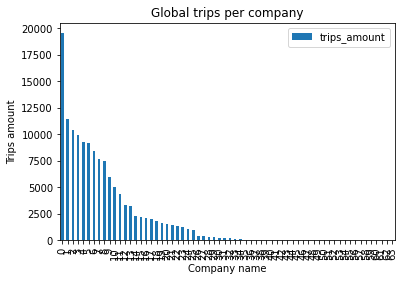

In [80]:
# Hacer gráficos: empresas de taxis y número de viajes
data_sql_01.plot(kind='bar')
plt.title('Global trips per company')
plt.xlabel('Company name')
plt.ylabel('Trips amount')
plt.show()

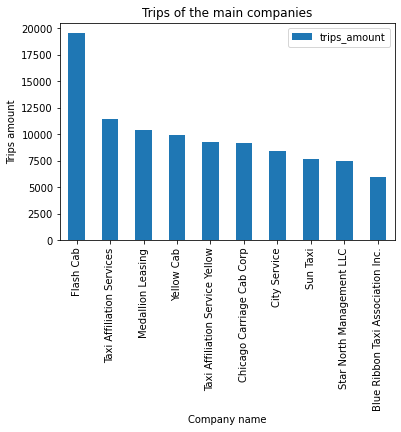

In [81]:
# Hacer gráficos: las principales empresas de taxis y número de viajes
company_name_trips.plot(kind='bar', x='company_name', y='trips_amount')
plt.title('Trips of the main companies')
plt.xlabel('Company name')
plt.ylabel('Trips amount')
plt.show()

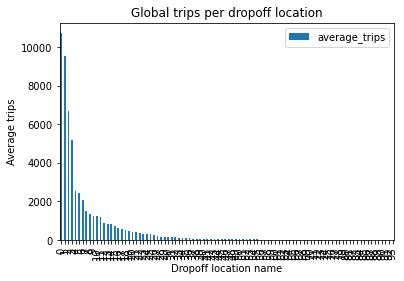

In [82]:
# Hacer gráficos: los barrios por número de finalizaciones
data_sql_04.plot(kind='bar')
plt.title('Global trips per dropoff location')
plt.xlabel('Dropoff location name')
plt.ylabel('Average trips')
plt.show()

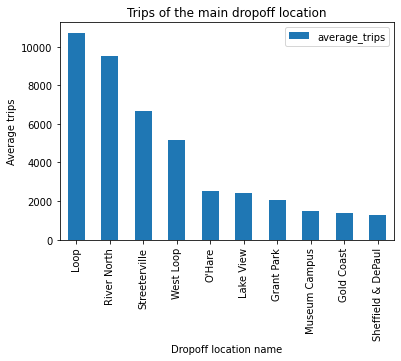

In [83]:
# Hacer gráficos: los 10 barrios principales por número de finalizaciones
dropoff_location.plot(kind='bar', x='dropoff_location_name', y='average_trips')
plt.title('Trips of the main dropoff location')
plt.xlabel('Dropoff location name')
plt.ylabel('Average trips')
plt.show()

En esta ocasión podemos observar que la empresa que tiene un mayor número del promedio de viajes es Flash Cab con 19558 viajes en promedio, el cual tiene casi el doble de viajes promedio dela siguiente empresa con mayor número de viajes promedio es  Taxi Affiliation ServiceS con 11422 viajes, los siguientes datos de las siguientes 8 empresas  tienen valores entre 10367 y 5953 viajes. 

Mientras que podemos observar que el barrios en donde finalizan más viajes viajes son en Loop con 10727 y  solamente las siguientes tres empresas  River North, Streeterville y West Loop, en donde se observan más de 4000 viajes finalizados y los siguientes  barrios tienen menos de 3000  viajes finalizados. 


## Paso 4. Prueba de hipótesis (Python) <a id="hyp"></a>

In [84]:
data_sql_07= pd.read_csv('/datasets/project_sql_result_07.csv')
data_sql_07

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [85]:
data_sql_07['start_ts']=pd.to_datetime(data_sql_07['start_ts'], format= '%Y-%m-%d %H:%M:%S')
data_sql_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [86]:
data_sql_07['dayOfWeek']= pd.DatetimeIndex(data_sql_07['start_ts']).dayofweek
data_sql_07

,start_ts,weather_conditions,duration_seconds,dayOfWeek
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [87]:
data_sql_07['dayOfWeek'].value_counts()

5    1068
Name: dayOfWeek, dtype: int64

Con esto podemos confirmar a que todos los datos son de días sábados, ya que se agregó una columna que represente el día de la semana, siendo el número 5 el sábado comenzando el indice semanal en 0.

In [88]:
data_sql_07.pivot_table(index='dayOfWeek', values='duration_seconds', aggfunc='mean') 

,duration_seconds
dayOfWeek,
5,2071.731273


In [89]:
data_sql_07.pivot_table(index='weather_conditions', values='duration_seconds', aggfunc='mean') 

,duration_seconds
weather_conditions,
Bad,2427.205556
Good,1999.675676


In [90]:
bad_mean=data_sql_07.query('weather_conditions=="Bad"')['duration_seconds'].mean()
bad_mean

2427.2055555555557

In [91]:
good_mean= data_sql_07.query('weather_conditions=="Good"')['duration_seconds'].mean()
good_mean

1999.6756756756756


### Prueba la hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".



En esta hipótesis utilizaremos un umbral del 5%, ya que es uno de los valores más comunes, en este caso no contamos con la varianza de los datos, por lo que las calcularemos para determinar si tenemos varainzas semejantes o diferentes en los dos dataframe.

In [92]:
bad_list=data_sql_07.query('weather_conditions=="Bad"')['duration_seconds']
bad_list

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

In [93]:
good_list=data_sql_07.query('weather_conditions=="Good"')['duration_seconds']
good_list

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

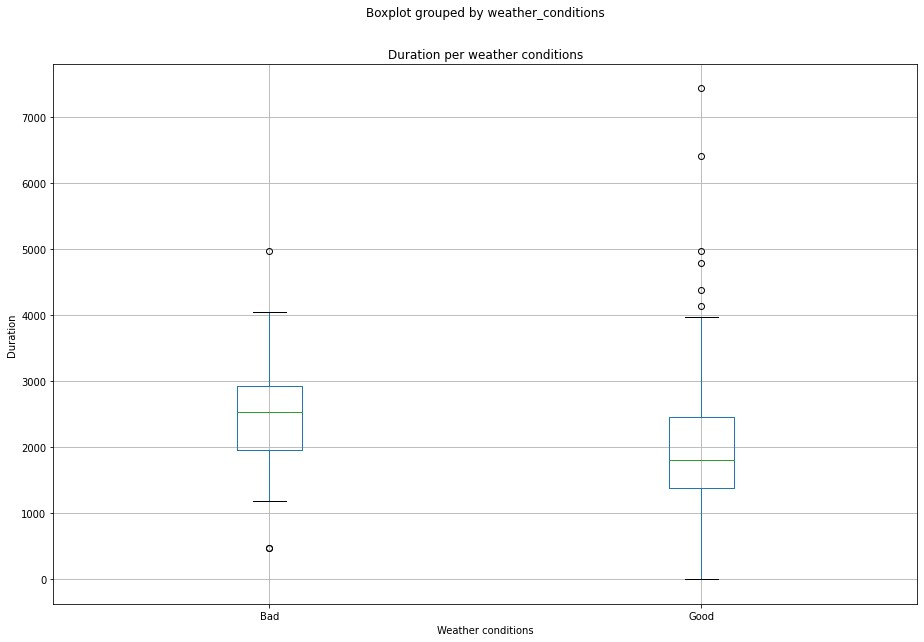

In [94]:
data_sql_07.boxplot(column='duration_seconds', by='weather_conditions', figsize=(15,10))
plt.title('Duration per weather conditions')
plt.xlabel('Weather conditions')
plt.ylabel('Duration')
plt.show()

In [95]:
bad_list.describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

In [96]:
good_list.describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [97]:
q1_bad=bad_list.quantile(0.25)
q3_bad=bad_list.quantile(0.75)
iqr_bad=q3_bad-q1_bad

limit_min_bad=q1_bad-(1.5*iqr_bad)
limit_sup_bad=q3_bad+(1.5*iqr_bad)

q1_bad, q3_bad , limit_min_bad, limit_sup_bad

(1962.0, 2928.0, 513.0, 4377.0)

In [98]:
q1_good=good_list.quantile(0.25)
q3_good=good_list.quantile(0.75)
iqr_good=q3_good-q1_good

limit_min_good=q1_good-(1.5*iqr_good)
limit_sup_good=q3_good+(1.5*iqr_good)

q1_good, q3_good , limit_min_good, limit_sup_good

(1389.75, 2460.0, -215.625, 4065.375)

In [99]:
data_bad_list=data_sql_07.query('weather_conditions=="Bad" and @limit_min_bad <= duration_seconds <= @limit_sup_bad')['duration_seconds']
data_bad_list.describe()

count     177.000000
mean     2434.785311
std       670.068237
min      1182.000000
25%      1980.000000
50%      2560.000000
75%      2926.000000
max      4044.000000
Name: duration_seconds, dtype: float64

In [100]:
data_good_list=data_sql_07.query('weather_conditions=="Good" and @limit_min_good <= duration_seconds <= @limit_sup_good')['duration_seconds']
data_good_list


0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 882, dtype: float64

Se revisaron la existencia de datos  atípicos o  outliers en el data, llegando a haber al rededor de 9 valores outliers, los cuales se eliminaron, para obtener un análisis de datos más limpio.

In [101]:
np.var(data_bad_list)

446454.7674678413

In [102]:
np.var(data_good_list)

492837.27465407935

In [103]:
[np.var(x,ddof=1) for x in [data_bad_list,data_good_list]]

[448991.44228299946, 493396.68132224516]

Sacamos las varianzas de los dataframe que manejamos y no son iguales, por lo que utilizaremos equal_var=False. Para comprobar esta hipótesis se utilizara metodo scipy.stats.ttest_ind (array, popmean), por loq ue nuestra hipótesis nula será: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en los sábados lluviosos". Mientras que nuestra hipótesis alternativa es: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [104]:
alpha= 0.05 
result = st.ttest_ind(bad_list,good_list, equal_var=False)
print('p-value: ', result.pvalue)
if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en los sábados lluviosos.")
else:
    print("No rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en los sábados lluviosos.") 

p-value:  6.738994326108734e-12
Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en los sábados lluviosos.


Como podemos observar se rechaza la hipótesis nula, por o tanto, podemos aceptar la hipótesis alterna:  "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

## Conclusiones <a id="end"></a>

1. Los datos provistos por las consultas SQL se encontraron prácticamente limpios. Los mismos requirieron preprocesamientos sencillos como la conversión de tipo de datos o el truncar datos de fecha y hora a exclusivamente fecha.
2. Los barrios de Chicago en los que se culminaron la mayor cantidades de viajes en noviembre de 2017 fueron: 1) Loop, 2) River North y 3) Streeterville
3. De conformidad con los resultados de la prueba de hipótesis, se concluye que lo más probable es que efectivamente la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.